<a href="https://colab.research.google.com/github/anmorgan24/Colab-Notebooks/blob/main/Convolution_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

## Import packages

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [ ]:
X_train[0].shape

(28, 28)

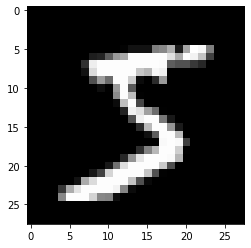

In [ ]:
plt.imshow(X_train[0], cmap='gray')

In [ ]:
y_train[0]

5

## Preprocessing the image data

In [ ]:
image_height, image_width = 28,28

**Note:** If we wanted to use this as the input to our neural network, we would need to reshape our image so that instead of being a 28 x 28 image, we want to have a single line that is 784 across.

In [ ]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


The above code gives us **one** layer, with **784** neurons across. This is the "correct" format in order to feed the data into our neural network.

Now we want to rescale our data from 0 to 1, as our original image is grayscale.

First we'll need to convert the data to a float, in order to divide by 255 (the current scale of the data).

To show that the current scale is 0 to 255, simply print one image array:

In [ ]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [ ]:
# Convert to float type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
X_train /= 255.0
X_test /= 255.0

In [ ]:
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

We can see that the scale of the array has been converted from **0 - 255** to **0 - 1**.

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


We see that y is a one dimensional array (of labels).

**We want the last layer to be one where we can send out the result or output into one of ten bins, representing the digits 0 - 9.**

We can do that using the `to_categorical()` function.

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


Here we can see that y has gone from a 1-dimensional array to a 2-dimensional array with 10 separate bins or classes. The output of our model will now go into one of these ten bins.

In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


See above: `y_train` and `y_test` were binned because they represent the labels. See that `y_train[0]` is represented by a `1` (`True`) at the fifth position.

## Build a model

The model we will build will go from the original 784 nodes (the original image is 28 x 28 = 784 pixels when reshaped into a line) $\Rightarrow$ we then go down to 512 nodes in each of two layers, and then finally to ten nodes, because our output needs to be one of ten digits. 

`28 x 28` $\Rightarrow$ reshaped $\Rightarrow$ `784`

model layers:

`784` $\Rightarrow$ `512` $\Rightarrow$ `512` $\Rightarrow$ `10`

In [ ]:
model = Sequential()

For fully connected node(s) use `Dense`; we know that for first layer we will have 512 output nodes:

Below we create the first layer of our neural network model.

**Note:** The original exercise notebook did not use regularization however when I used this without regularization, the model calculated the loss as `nan`.

In [ ]:
model.add(Dense(512, activation='relu', input_shape = (784,), kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))

We then create the next layer, which we know will also have 512 nodes, we will also use ReLU here, **but this time we don't need to specify the input node because `Keras` is able to determine that (and is 512 nodes).

In [ ]:
model.add(Dense(512, activation= 'softmax'))

In [ ]:
model.add(Dense(10, activation='relu'))

## Compile the model

Before we can train our model, we'll need to compile our model.

**Note:** The original exercise notebook used `loss = 'categorical_crossentropy'`, however when I used this the model calculated the loss as `nan`.

In [ ]:
model.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


How do we get the above. number of parameters? 

We original have 784 inputs, which terminate into 512 nodes, and we need to include a bias.

We can calculate the first layer's parameters as follows:

In [ ]:
784 * 512

401408

Add in the bias, which is 512:

In [ ]:
784 * 512 + 512

401920

We can calculate the second layer's parameters as follows:

In [ ]:
512 * 512 + 512

262656

ANd finally, we can calculate the third layer's parameters as follows:

In [ ]:
512 * 10 + 10

5130

For a total number of parameters of:

In [ ]:
401920 + 262656 + 5130

669706

## Train the model

Now that we've compiled our model, let's look at training it.

We need to provide:
- the training model
- the number of epochs
- a parameter for the validation data

In [ ]:
model.fit(x=X_train, y=y_train, epochs=2, validation_data=(X_test, y_test))

Epoch 1/2
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1466 - accuracy: 0.3611 - val_loss: 0.0714 - val_accuracy: 0.5587
Epoch 2/2
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0654 - accuracy: 0.6033 - val_loss: 0.0599 - val_accuracy: 0.6400


In [ ]:
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0599 - accuracy: 0.6608 - val_loss: 0.0572 - val_accuracy: 0.6897
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0579 - accuracy: 0.6705 - val_loss: 0.0579 - val_accuracy: 0.6812
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0562 - accuracy: 0.6842 - val_loss: 0.0549 - val_accuracy: 0.6905
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0551 - accuracy: 0.6906 - val_loss: 0.0549 - val_accuracy: 0.7157
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0545 - accuracy: 0.6872 - val_loss: 0.0510 - val_accuracy: 0.7162
Epoch 6/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0535 - accuracy: 0.7020 - val_loss: 0.0513 - val_accuracy: 0.7034
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0534 - accuracy: 0.6985 - val_loss: 0.0514 - val_ac

## What is the accuracy of the model?

### Plot the accuracy of the training model

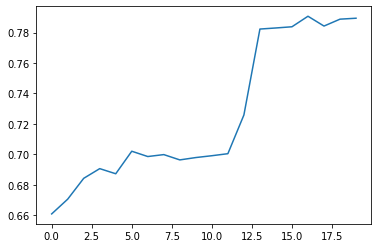

In [ ]:
plt.plot(history.history['accuracy'])

### Plot the accuracy of training and validation set

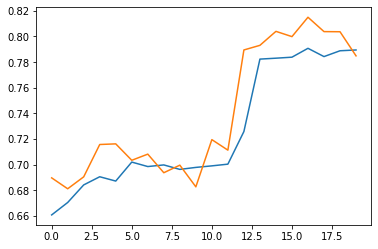

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### Accuracy of training and validation with loss

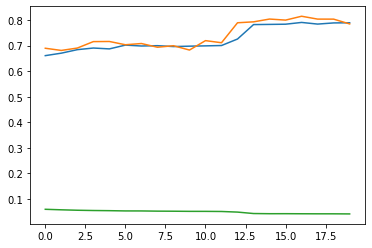

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])

## Evaluate the model

In [ ]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0407 - accuracy: 0.7848


In [ ]:
score

[0.04065466299653053, 0.7847999930381775]

We can see that score is a list and it give us an accuracy of our model of about **78.5%**

## Run a prediction

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons
- What results do you get when trying to use another activation function?

# Convolution Neural Network

## Import the libraries

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
#from keras.utils import to_categorical

# import matplotlib.pyplot as plt
# %matplotlib inline

In neural networks, we only have the fully-connected layer, otherwise known as the **dense layer**.

With convolution neural networks, we have far more operations, such as the convolution operation, max pooling, flattening, and also a fully connected or dense layer.

We'll use sequential under models, because this will give us a linear stack of neural network layers.

## Load the data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

Our MNIST images only have a depth of 1, but we must explicitly declare that and then reshape our data.

Again, we want to rescale our data so that it's between 0 and 1. As these images are grayscale the pixel values will be between 0 and 255.

In [ ]:
batch_size = 128
num_classes = 10
epochs = 3

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


## Use the model

In [ ]:
# cnn = Sequential()
# cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
# cnn.add(MaxPooling2D())
# cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
# cnn.add(MaxPooling2D())
# cnn.add(Flatten())
# cnn.add(Dense(64,activation='relu'))
# cnn.add(Dense(10,activation='softmax'))
# cnn.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
# print(cnn.summary())

In [ ]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(5,5),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Conv2D(64, kernel_size=(5,5),padding='same', activation='relu'))
cnn.add(MaxPooling2D())
cnn.add(Flatten())
cnn.add(Dense(1024,activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(cnn.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 1024)             

The below code is exactly what we used above in neural networks. 
This will take about 15-20 minutes to train *per epoch*.

These calls have been commented out and we are going to try an alternate way of determining the weights.

In [ ]:
# history_cnn = cnn.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_train,y_train))

Recall that when using neural networks we got good accuracy.

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])

Comparing this to using CNNs - the performance is far superior.

In [ ]:
# plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
# plt.plot(history_cnn.history['acc'])
# plt.plot(history_cnn.history['val_acc'])

## Predetermined weights

In [ ]:
# import pandas as pd

In [ ]:
# df = pd.read_csv('data/olympics.csv',skiprows=4)
# df.head()

In [ ]:
cnn.load_weights('cnn-model5.h5')

In [ ]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 10s 31ms/step - loss: 127.7757 - accuracy: 0.0974


In [ ]:
score

[127.77571105957031, 0.09740000218153]

The weights predetermined by the course instructor clearly do not work very well with the updated model code, which utilizes MSE as an evaluation metric and L2 regularization.